In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


with plt.style.context(['science','no-latex','ieee']):

In [22]:
df = pd.read_csv('test_df_2.csv')

In [23]:
df

,Unnamed: 0,RunId,iteration,Step,time_collusion,seed,HHI,Distance,Reveneue,Average_price,...,Number_of_firms,AgentID,Type,Quality,Revenue,Quantity_sold,Price,Net_worth,Initial_budget,budget
0,0,1,0,0,500,22130640,0.000000,0.000000,0.00000,1.000000,...,50,1,Household,NaN,NaN,NaN,NaN,NaN,6.255430,6.255430
1,1,1,0,0,500,22130640,0.000000,0.000000,0.00000,1.000000,...,50,2,Household,NaN,NaN,NaN,NaN,NaN,2.302171,2.302171
2,2,1,0,0,500,22130640,0.000000,0.000000,0.00000,1.000000,...,50,3,Household,NaN,NaN,NaN,NaN,NaN,4.005498,4.005498
3,3,1,0,0,500,22130640,0.000000,0.000000,0.00000,1.000000,...,50,4,Household,NaN,NaN,NaN,NaN,NaN,6.542240,6.542240
4,4,1,0,0,500,22130640,0.000000,0.000000,0.00000,1.000000,...,50,5,Household,NaN,NaN,NaN,NaN,NaN,2.496540,2.496540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11747301,11747301,19,0,1010,1000,42822796,0.028277,0.678539,2302.58762,3.291725,...,50,977,Firm,21.733047,74.062614,8.0,9.191425,4349.338449,NaN,NaN
11747302,11747302,19,0,1010,1000,42822796,0.028277,0.678539,2302.58762,3.291725,...,50,978,Firm,18.599365,93.257872,12.0,7.715749,4225.285254,NaN,NaN
11747303,11747303,19,0,1010,1000,42822796,0.028277,0.678539,2302.58762,3.291725,...,50,979,Firm,6.625124,0.000000,0.0,0.649247,2780.000000,NaN,NaN
11747304,11747304,19,0,1010,1000,42822796,0.028277,0.678539,2302.58762,3.291725,...,50,980,Firm,12.744201,7.304281,2.0,3.625946,2959.872089,NaN,NaN


In [24]:
df_grouped = df.groupby(['Step', 'seed', 'time_collusion'])['HHI', 'Distance', 'Average_price', 'Quality', 'Number_of_firms', 'Revenue'].mean().reset_index()

/var/folders/33/dr4cqnzj0597_7n7kbsrfht8cdq0jk/T/ipykernel_14750/886081242.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_grouped = df.groupby(['Step', 'seed', 'time_collusion'])['HHI', 'Distance', 'Average_price', 'Quality', 'Number_of_firms', 'Revenue'].mean().reset_index()


In [25]:
# keep only df_grouped where Step <  1000 
df_grouped = df_grouped[df_grouped['Step'] < 1000]
# rename time_collusion to Scenario
df_grouped.rename(columns={'time_collusion': 'Scenario'}, inplace=True)
# subsitute  time_collusion = 500 with "Collusion"
df_grouped['Scenario'] = df_grouped['Scenario'].replace(500, 'Collusion')
# subsitute  time_collusion = 1000 with "No Collusion"
df_grouped['Scenario'] = df_grouped['Scenario'].replace(1000, 'No Collusion')



In [26]:
palette = sns.color_palette("colorblind", 2)


In [27]:
df_grouped['HHI_change'] = df_grouped['HHI'].diff()
df_grouped['Distance_change'] = df_grouped['Distance'].diff()

In [28]:
# scale Distance between 0 and 1
df_grouped['Distance'] = (df_grouped['Distance'] - df_grouped['Distance'].min()) / (df_grouped['Distance'].max() - df_grouped['Distance'].min())

In [42]:
palette

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549)]

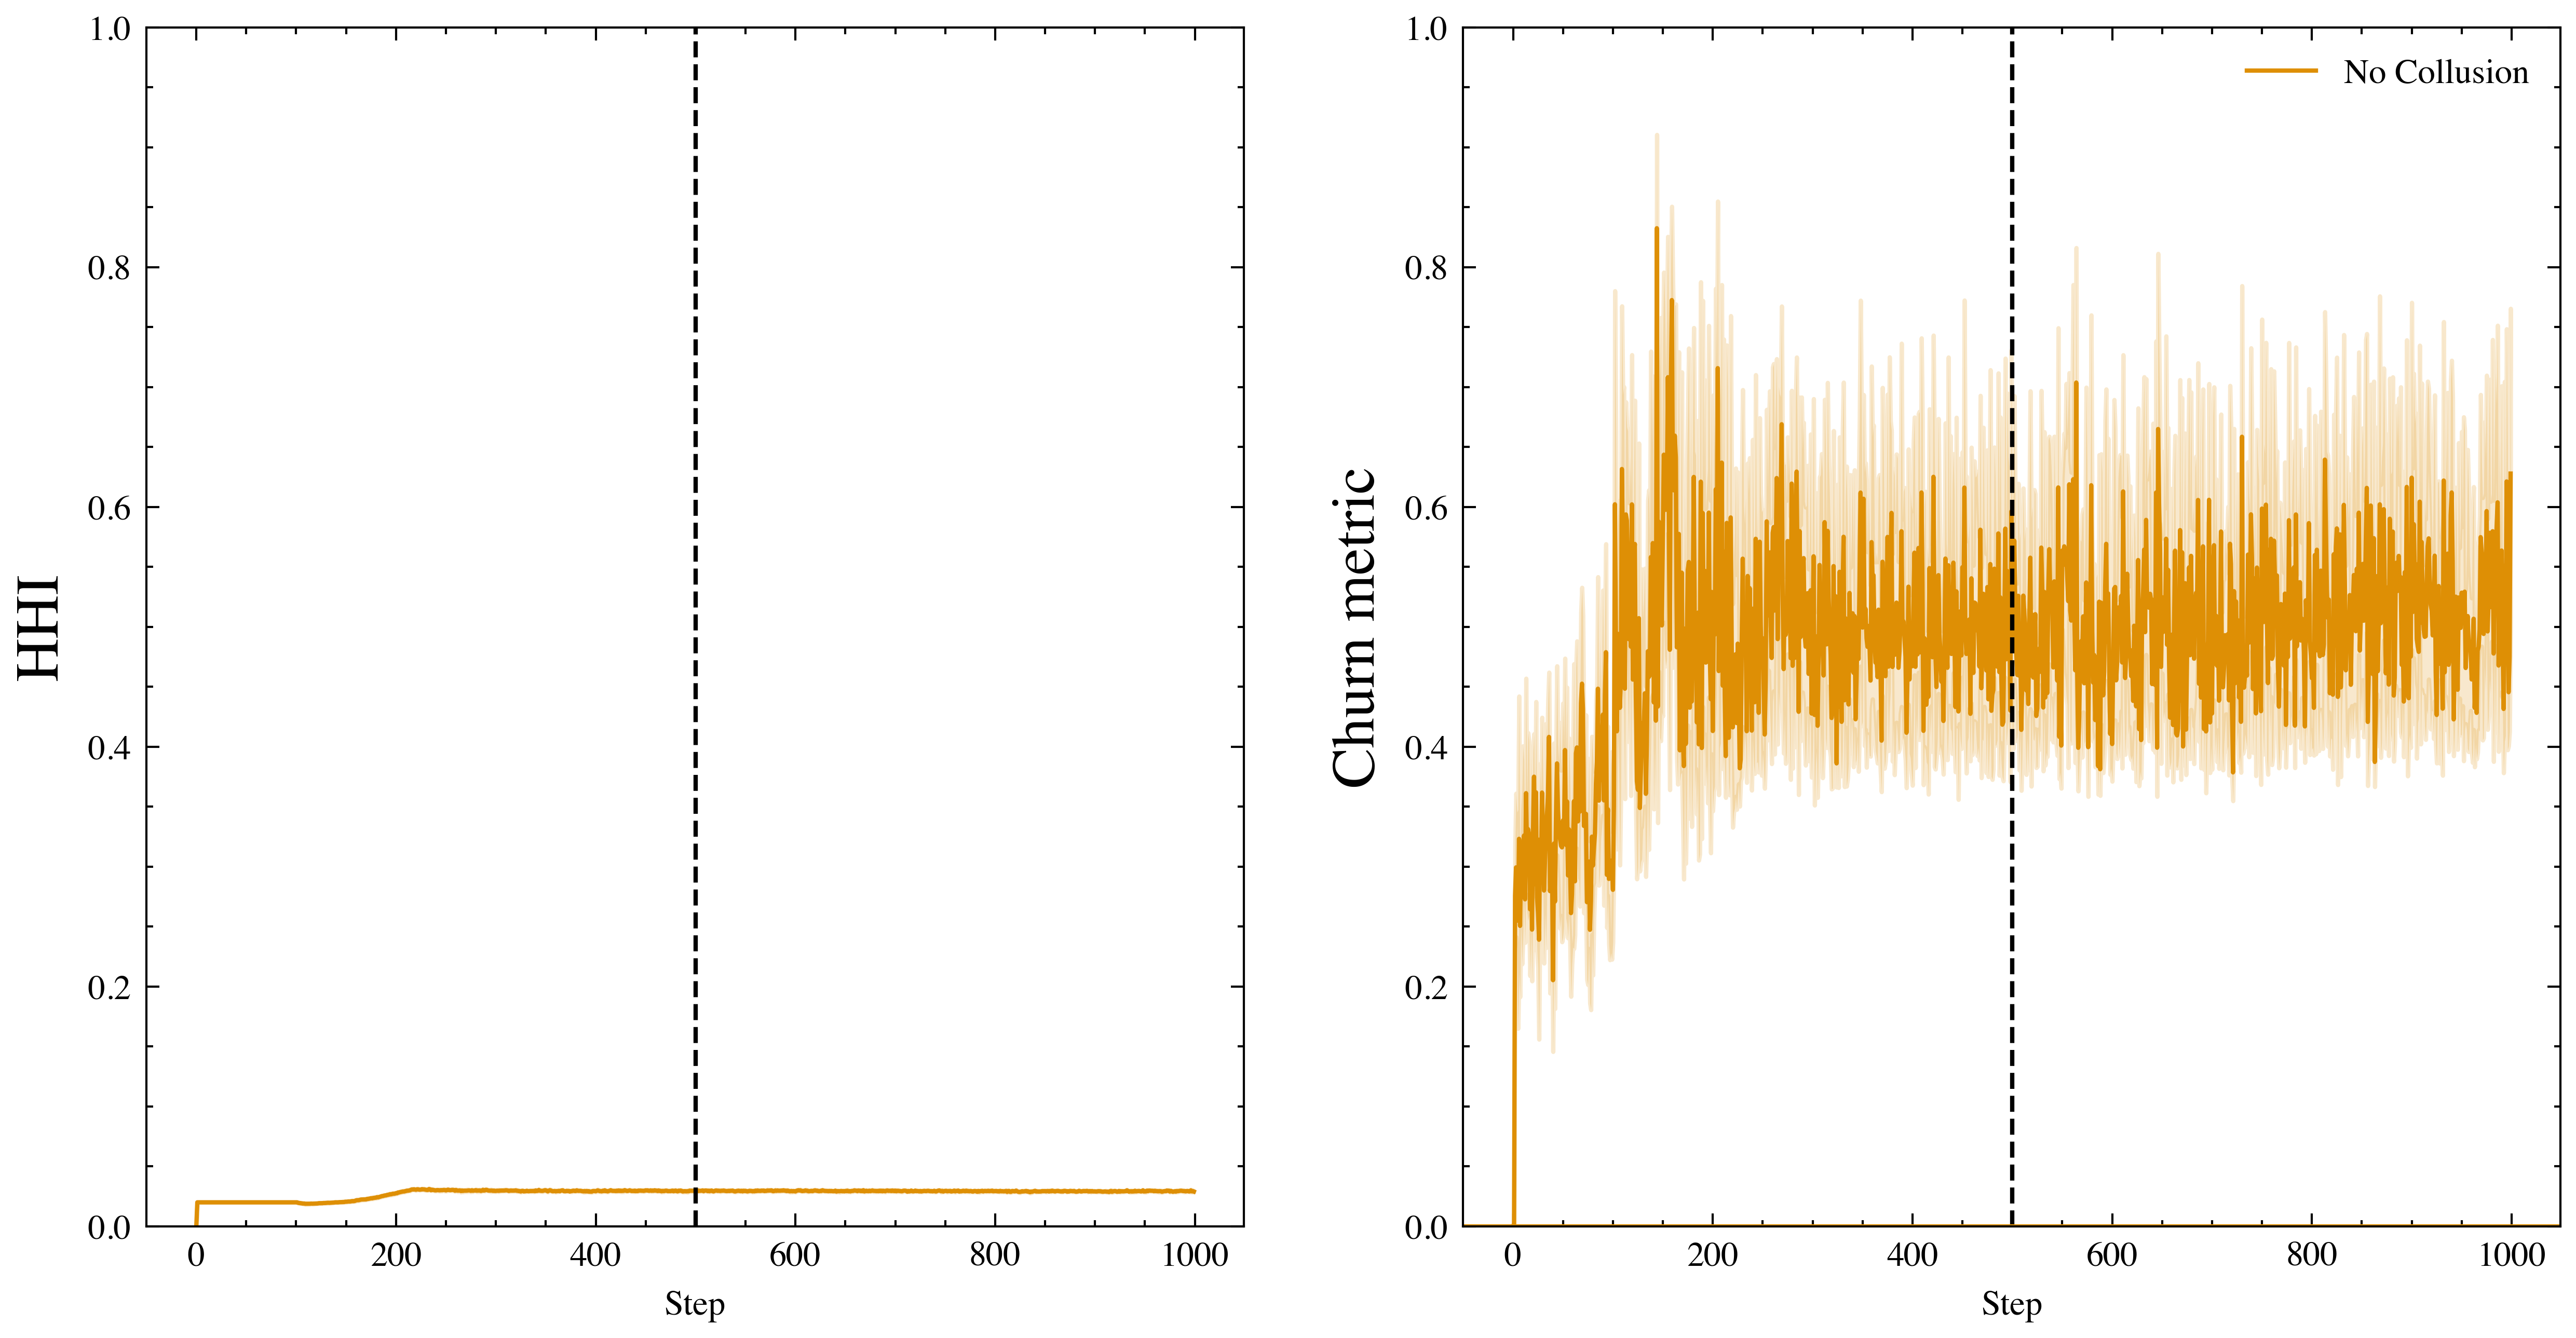

In [49]:
# make a dataframe with only  the No Collusion scenario
df_grouped_no_collusion = df_grouped[df_grouped['Scenario'] == 'No Collusion']
with plt.style.context(['science','no-latex','ieee']):
    # plot the HHI and Distance in 2 separate plots
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    sns.lineplot(x='Step', y='HHI', data=df_grouped_no_collusion,  color=palette[1], ax = ax[0], linestyle = 'solid', legend=False)
    sns.lineplot(x='Step', y='Distance', data=df_grouped_no_collusion,  color= palette[1], ax = ax[1], linestyle = 'solid', legend=False)
    # plot vertical lines for the collusion§
    ax[0].axvline(x=500, color='black', linestyle='--')
    ax[1].axvline(x=500, color='black', linestyle='--')
    #  rename the y axis of the Distance plot in "Churn metric"
    ax[0].set_ylabel('HHI', fontsize=14)
    ax[1].set_ylabel('Churn metric', fontsize=14)
    ax[1].axhline(y=0, color=palette[1], label = 'No Collusion')

    

    # set the y axis limits
    ax[0].set_ylim(0, 1)
    ax[1].set_ylim(0, 1)
    plt.legend()
    plt.show()


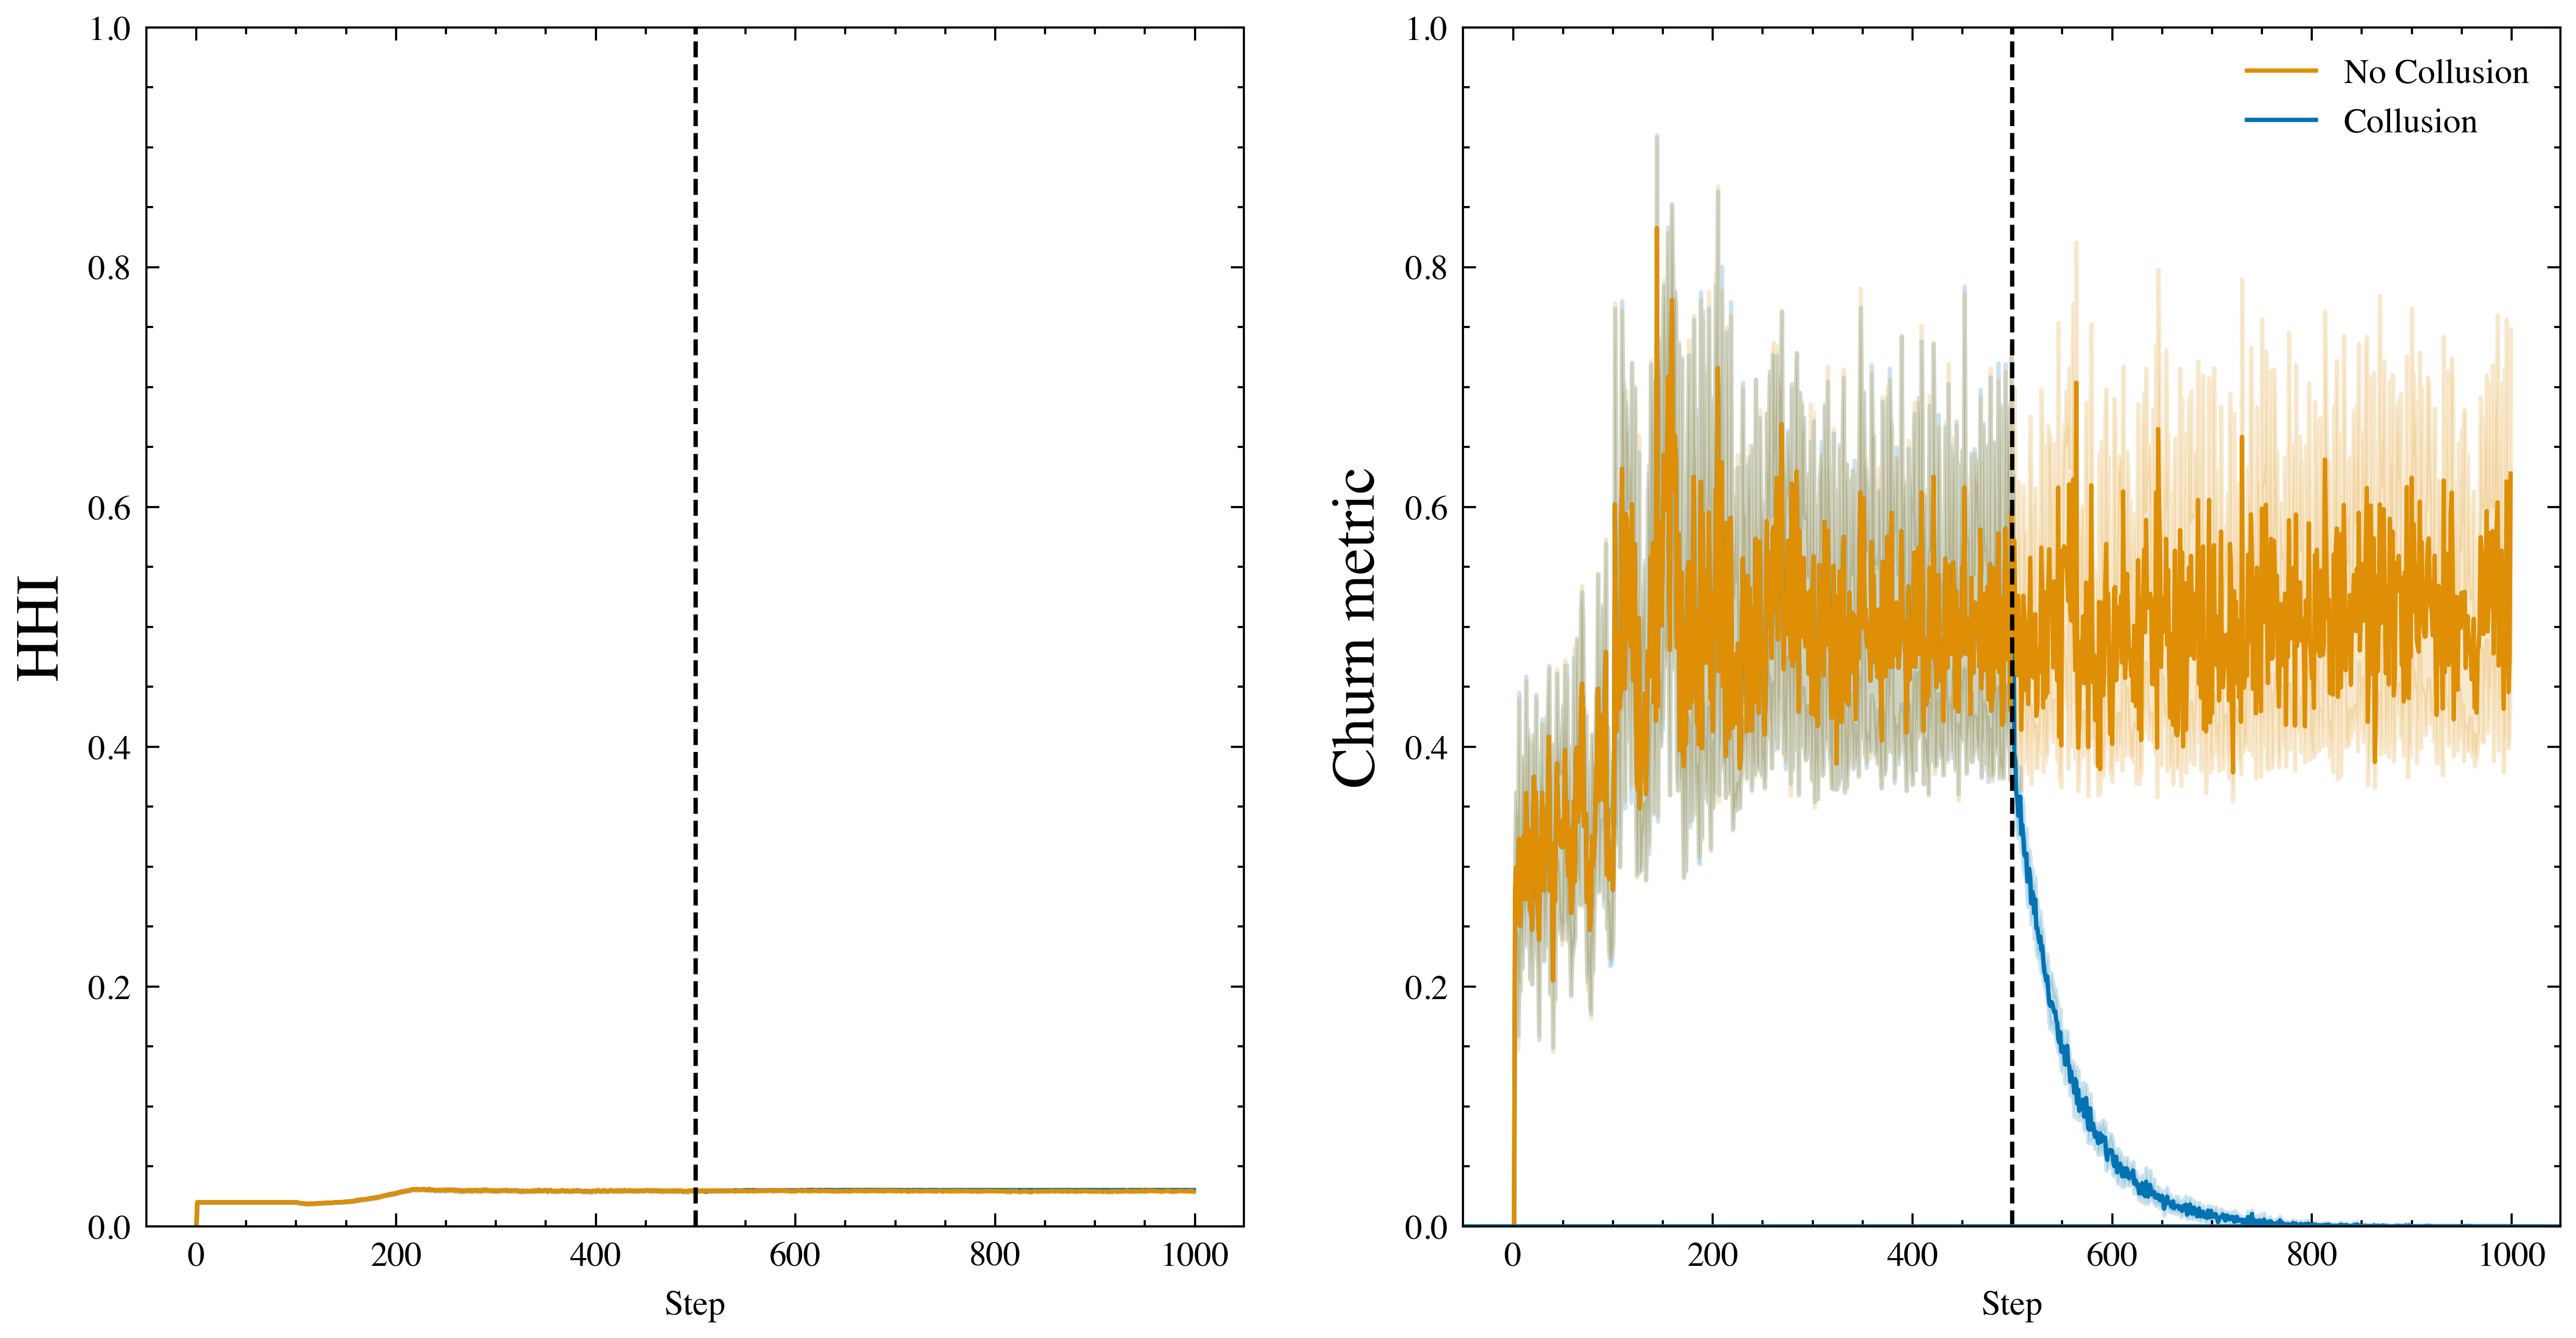

In [45]:
with plt.style.context(['science','no-latex','ieee']):
    # plot the HHI and Distance in 2 separate plots
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    sns.lineplot(x='Step', y='HHI', data=df_grouped, hue='Scenario', palette=palette, ax = ax[0], linestyle = 'solid', legend=False)
    sns.lineplot(x='Step', y='Distance', data=df_grouped, hue='Scenario', palette= palette, ax = ax[1], linestyle = 'solid', legend=False)
    # plot vertical lines for the collusion
    ax[0].axvline(x=500, color='black', linestyle='--')
    ax[1].axvline(x=500, color='black', linestyle='--')
    #  rename the y axis of the Distance plot in "Churn metric"
    ax[0].set_ylabel('HHI', fontsize=14)
    ax[1].set_ylabel('Churn metric', fontsize=14)
    ax[1].axhline(y=0, color=palette[1], label = 'No Collusion')
    ax[1].axhline(y=0, color=palette[0], label = 'Collusion')
    

    
    # set the x axis labels
    # set solid lines in the legend

    # set the y axis limits
    ax[0].set_ylim(0, 1)
    ax[1].set_ylim(0, 1)
    plt.legend()
    plt.show()
    # 


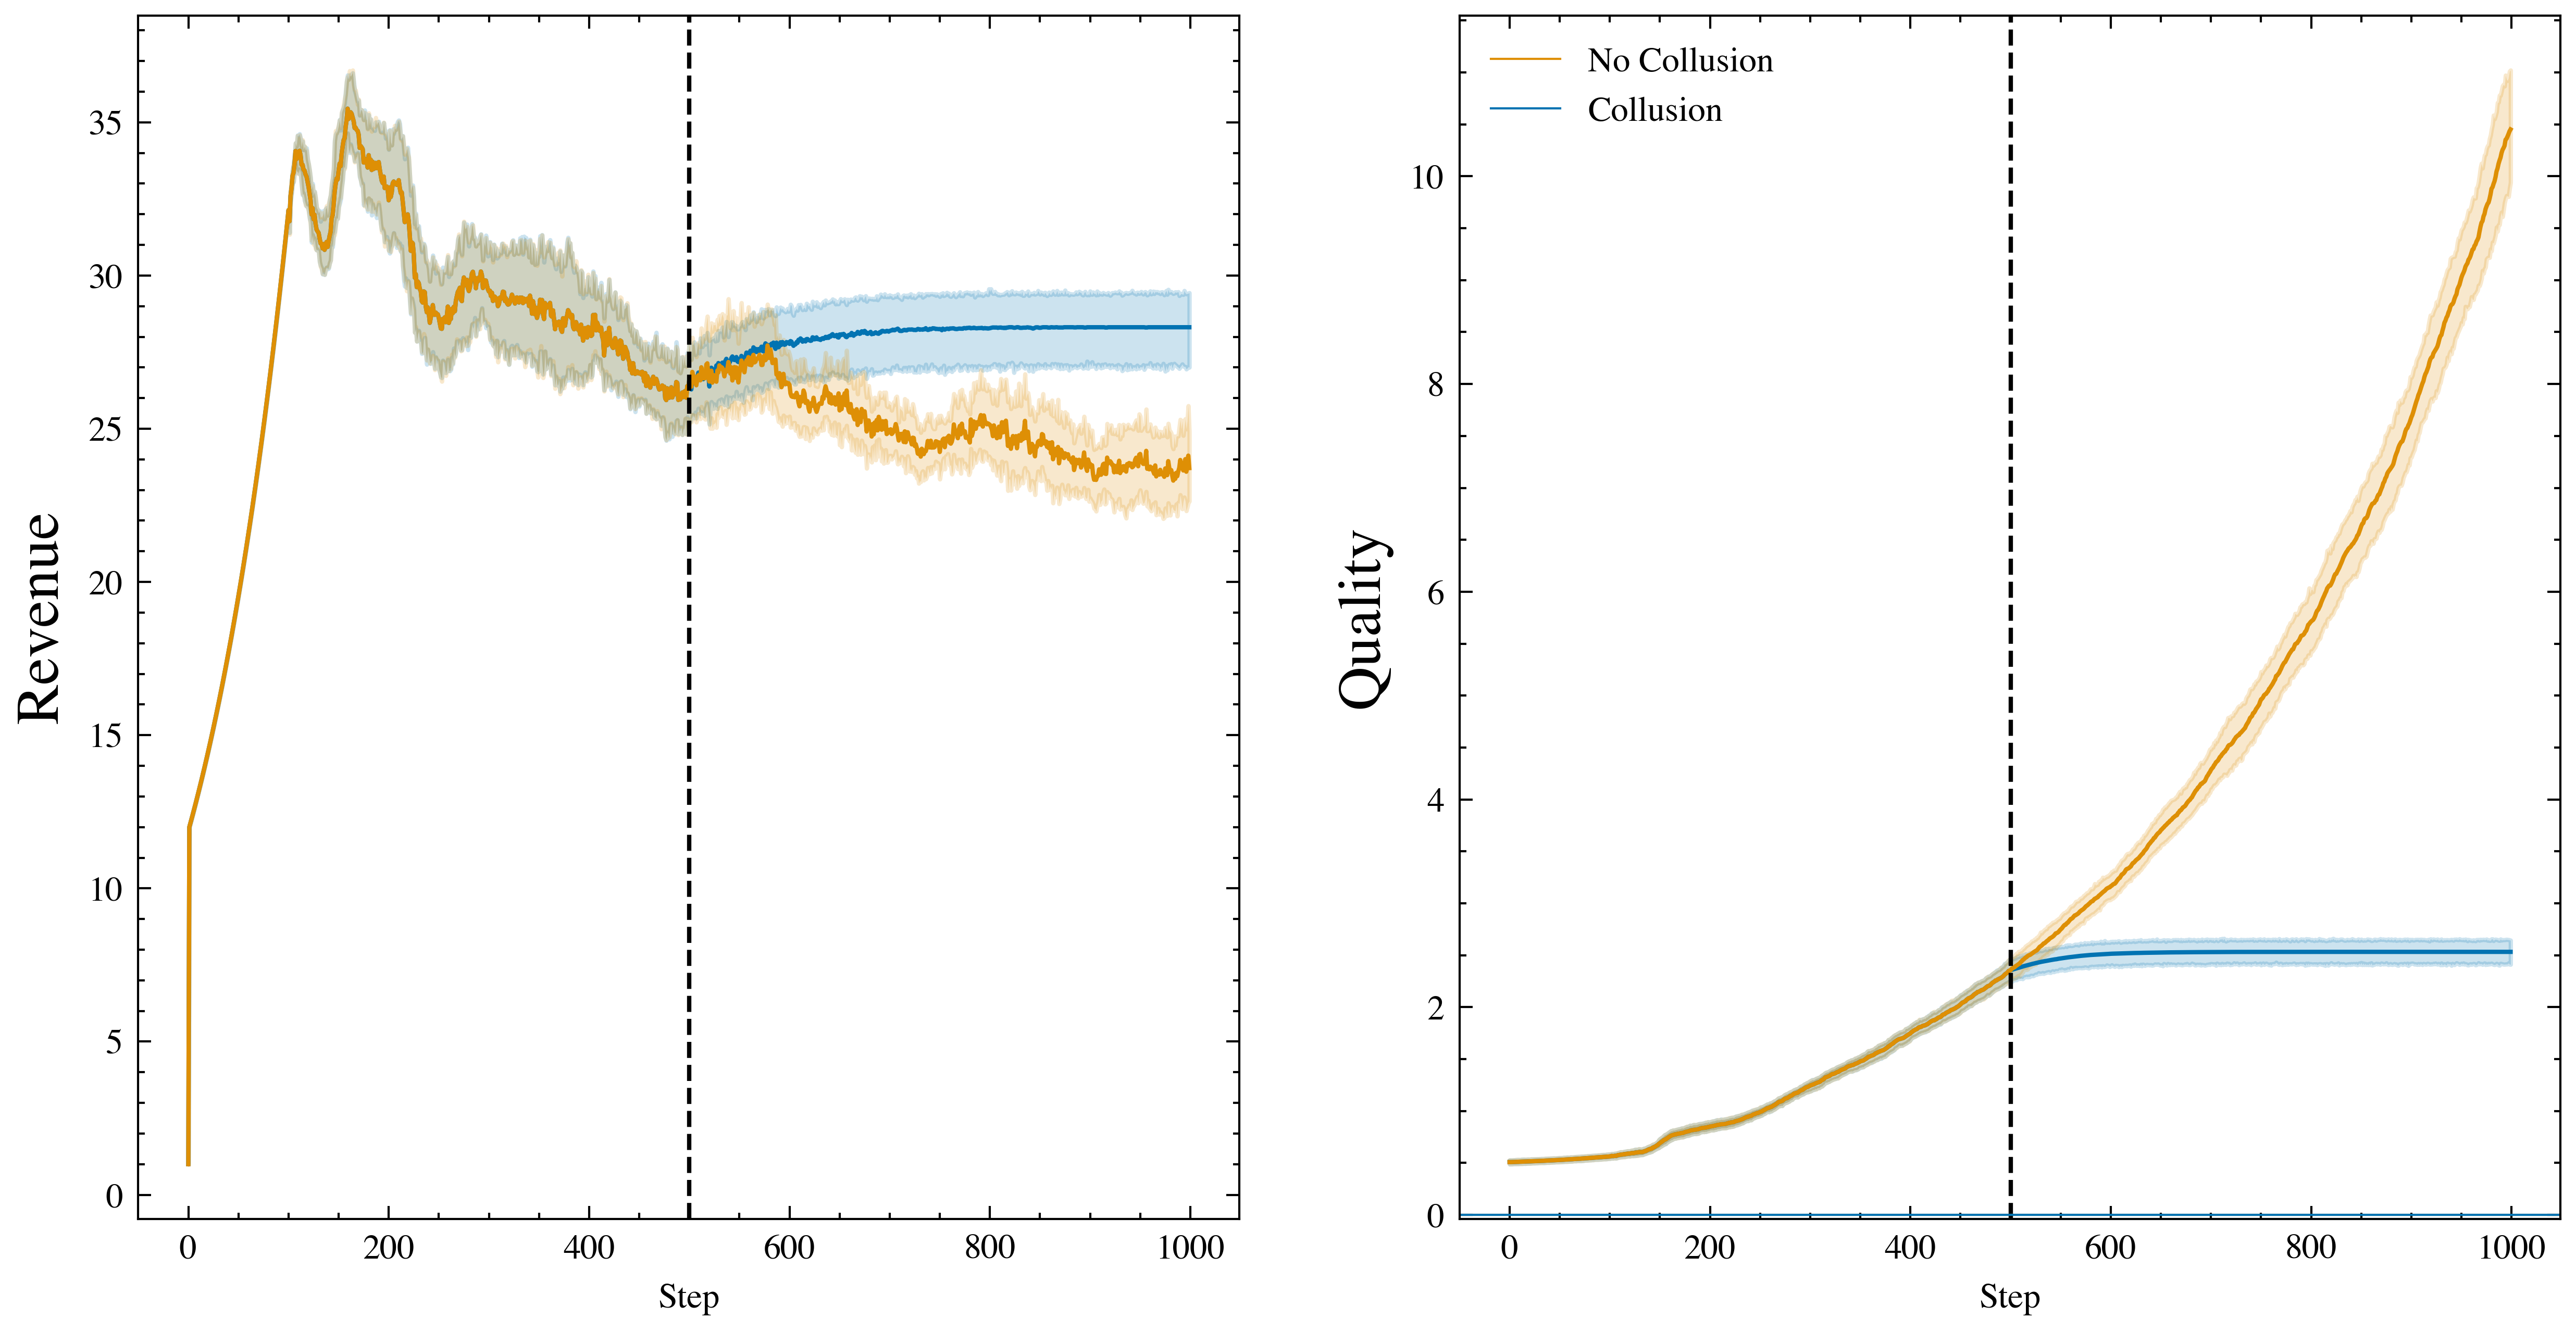

In [50]:
with plt.style.context(['science','no-latex','ieee']):
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    sns.lineplot(x='Step', y='Revenue', data=df_grouped, hue='Scenario', palette=palette, ax = ax[0], linestyle = 'solid', legend= False)
    sns.lineplot(x='Step', y='Quality', data=df_grouped, hue='Scenario', palette= palette, ax = ax[1], linestyle = 'solid', legend = False)
    # plot vertical lines for the collusion
    ax[0].axvline(x=500, color='black', linestyle='--')
    ax[1].axvline(x=500, color='black', linestyle='--')
    # set y axis label font size to 14
    ax[0].set_ylabel('Revenue', fontsize=14)
    ax[1].set_ylabel('Quality', fontsize=14)
    
    # make vertical lines very thin

    ax[1].axhline(y=0, color=palette[1], label = 'No Collusion', linewidth=0.5)
    ax[1].axhline(y=0, color=palette[0], label = 'Collusion', linewidth=0.5)
    

    # set axis limit between 0 an 1 

    plt.legend()
    plt.show()
    # 

In [31]:
with plt.style.context(['science','no-latex','ieee']):
    palette = sns.color_palette("colorblind", 2)

    sns.lineplot(x='Step', y='Quality', data=df_grouped, hue='time_collusion', palette=palette_1)
    # plot vertical lines for the collusion
    plt.axvline(x=500, color='black', linestyle='--')

NameError: name 'palette_1' is not defined

In [ ]:
sns.pairplot(df)

KeyboardInterrupt: 